In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from numpy.random import randint
import pandas as pd
print("Imported Successfully")

Imported Successfully


In [3]:
n = 3

In [6]:
def get_balanced(n, oracle_qc):
    # First generate a random number that tells us which CNOTs to
    # wrap in X-gates:
    b = np.random.randint(1,2**n)
    # Next, format 'b' as a binary string of length 'n', padded with zeros:
    b_str = format(b, '0'+str(n)+'b')
    # Next, we place the first X-gates. Each digit in our binary string 
    # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
    # we apply an X-gate to that qubit:
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    # Do the controlled-NOT gates for each qubit, using the output qubit as the target:
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
    # Next, place the final X-gates
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    return oracle_qc

In [7]:
def get_constant(n, oracle_qc):
    # (either always 0 or always 1)
    output = np.random.randint(2)
    if output == 1:
        oracle_qc.x(n)
    return oracle_qc

In [8]:
def dj_oracle(n):
    
    case = "balanced" if np.random.randint(2) == 0 else "constant"
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        oracle_qc = get_balanced(n, oracle_qc)

    # Case in which oracle is constant
    if case == "constant":
        oracle_qc = get_constant(n, oracle_qc)
        
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return (oracle_gate, case)

In [11]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

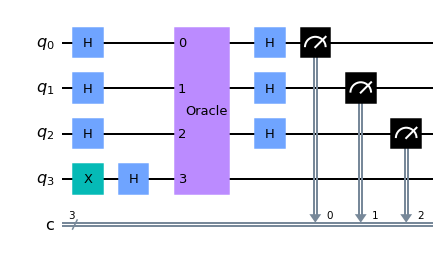

In [23]:
n = 3
oracle_gate, case = dj_oracle(n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output="mpl")

balanced


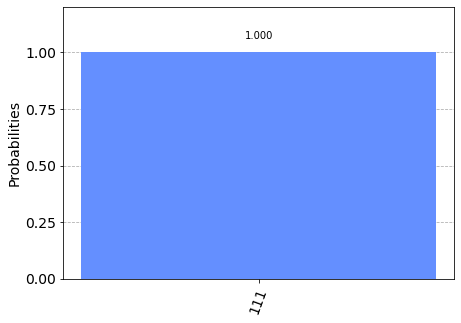

In [24]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print(case)
plot_histogram(answer)


constant
